In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [50]:
fcn_subset = pd.read_csv('../results/fcn_subset.csv')
deformable_fcn_subset = pd.read_csv('../results/deformable_fcn_subset.csv')
inception_subset = pd.read_csv('../results/inceptiontime_subset.csv')

subset_results = pd.concat([fcn_subset, deformable_fcn_subset, inception_subset])
subset_results.shape

(214, 8)

In [51]:
grouped_subset_results = subset_results.groupby(['model', 'dataset']).mean().reset_index()
grouped_subset_results

,model,dataset,exp,acc,f1,recall,precision,time
0,deffcn,ArrowHead,2.000000,0.856000,0.842944,0.866081,0.855813,234.196315
1,deffcn,BeetleFly,2.000000,0.920000,0.915045,0.914667,0.920947,105.369863
2,deffcn,Car,2.000000,0.926667,0.917877,0.917444,0.931936,303.864023
3,deffcn,Earthquakes,2.000000,0.725180,0.555624,0.568848,0.584196,1171.827311
4,deffcn,FaceAll,2.000000,0.935385,0.793440,0.783423,0.808631,1706.865763
5,deffcn,FreezerSmallTrain,2.000000,0.877193,0.534429,0.507984,0.567813,61.007055
6,deffcn,GunPointOldVersusYoung,2.000000,1.000000,1.000000,1.000000,1.000000,169.364932
7,deffcn,Ham,1.666667,0.709524,0.462421,0.414082,0.555480,280.575608
8,deffcn,InsectWingbeatSound,1.000000,0.413468,0.332356,0.359245,0.360613,351.153790
9,deffcn,Lightning7,2.000000,0.736986,0.632690,0.635623,0.666871,254.853508


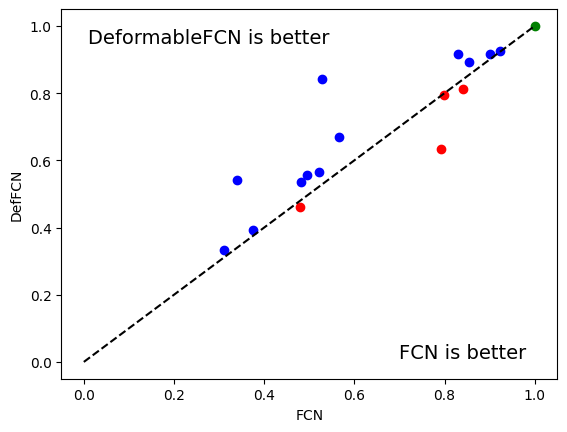

In [52]:
def set_color(acc1, acc2):
    if acc1 > acc2:
        return 'blue'
    elif acc2 > acc1:
        return 'red'
    else:
        return 'green'

for dataset in grouped_subset_results.dataset.value_counts().index:
    fcn_acc = grouped_subset_results.query(f'dataset == "{dataset}" and model == "fcn"').f1.values[0]
    def_fcn_acc = grouped_subset_results.query(f'dataset == "{dataset}" and model == "deffcn"').f1

    if len(def_fcn_acc) == 0:
        continue
    else:
        def_fcn_acc = def_fcn_acc.values[0]
    
    plt.plot(fcn_acc, def_fcn_acc, marker='o', color=set_color(def_fcn_acc, fcn_acc))
    

plt.plot(list(np.arange(0, 1.1, 0.1)), list(np.arange(0, 1.1, 0.1)), color='black', linestyle='dashed')    

plt.xlabel('FCN')
plt.ylabel('DefFCN')

plt.text(0.7, 0.01, 'FCN is better', fontdict={'size': 14})
plt.text(0.01, 0.95, 'DeformableFCN is better', fontdict={'size': 14})


plt.show()

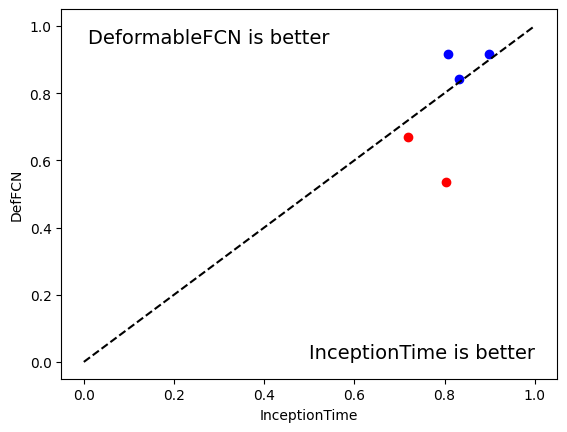

In [53]:
for dataset in grouped_subset_results.dataset.value_counts().index:
    inception_acc = grouped_subset_results.query(f'dataset == "{dataset}" and model == "inceptiontime"').f1
    def_fcn_acc = grouped_subset_results.query(f'dataset == "{dataset}" and model == "deffcn"').f1

    if len(def_fcn_acc) == 0 or len(inception_acc) == 0:
        continue
    else:
        inception_acc = inception_acc.values[0]
        def_fcn_acc = def_fcn_acc.values[0]
    
    plt.plot(inception_acc, def_fcn_acc, marker='o', color=set_color(def_fcn_acc, inception_acc))
    

plt.plot(list(np.arange(0, 1.1, 0.1)), list(np.arange(0, 1.1, 0.1)), color='black', linestyle='dashed')    

plt.xlabel('InceptionTime')
plt.ylabel('DefFCN')

plt.text(0.5, 0.01, 'InceptionTime is better', fontdict={'size': 14})
plt.text(0.01, 0.95, 'DeformableFCN is better', fontdict={'size': 14})


plt.show()

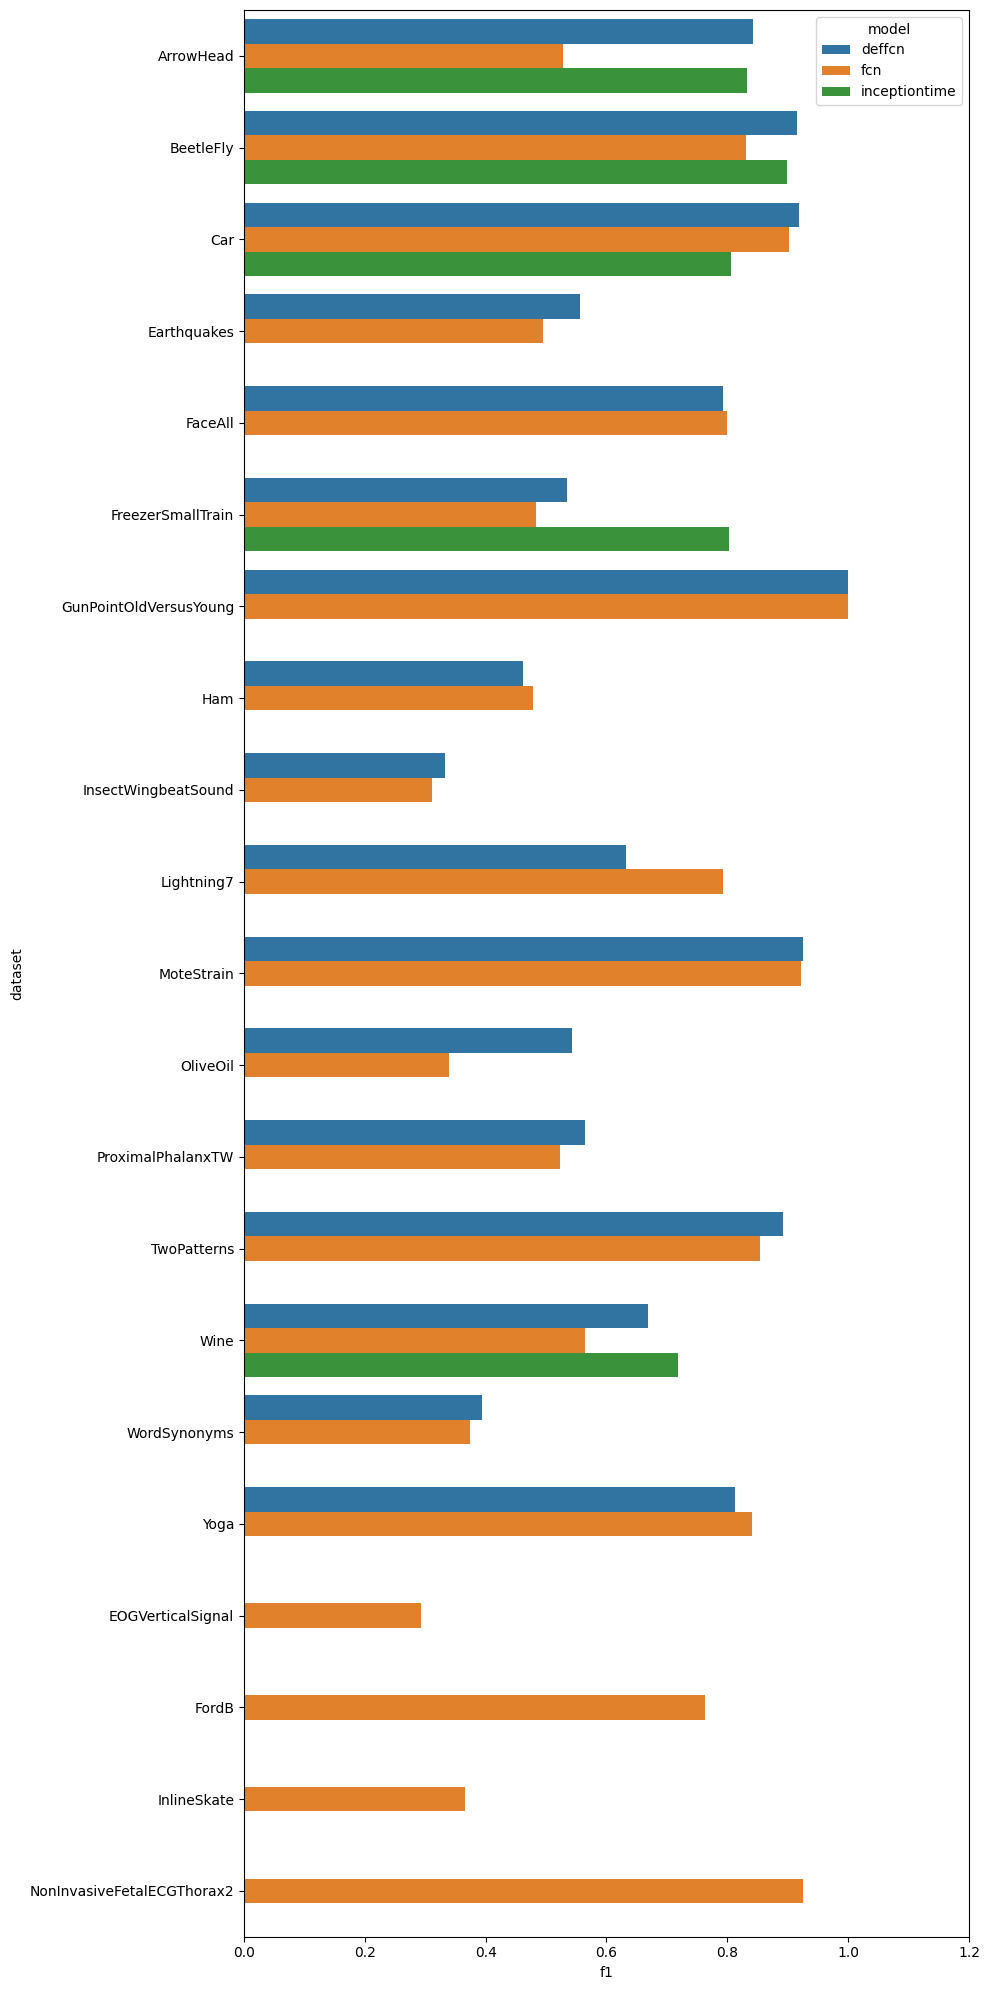

In [54]:
plt.figure(figsize=(10, 20))

ax = sns.barplot(data=grouped_subset_results, x='f1', y='dataset', hue='model')

# try:
#     ax.bar_label(ax.containers[0], labels=round(grouped_subset_results['f1'], 3))
# except:
#     pass

plt.xlim([0, 1.2])
plt.tight_layout()

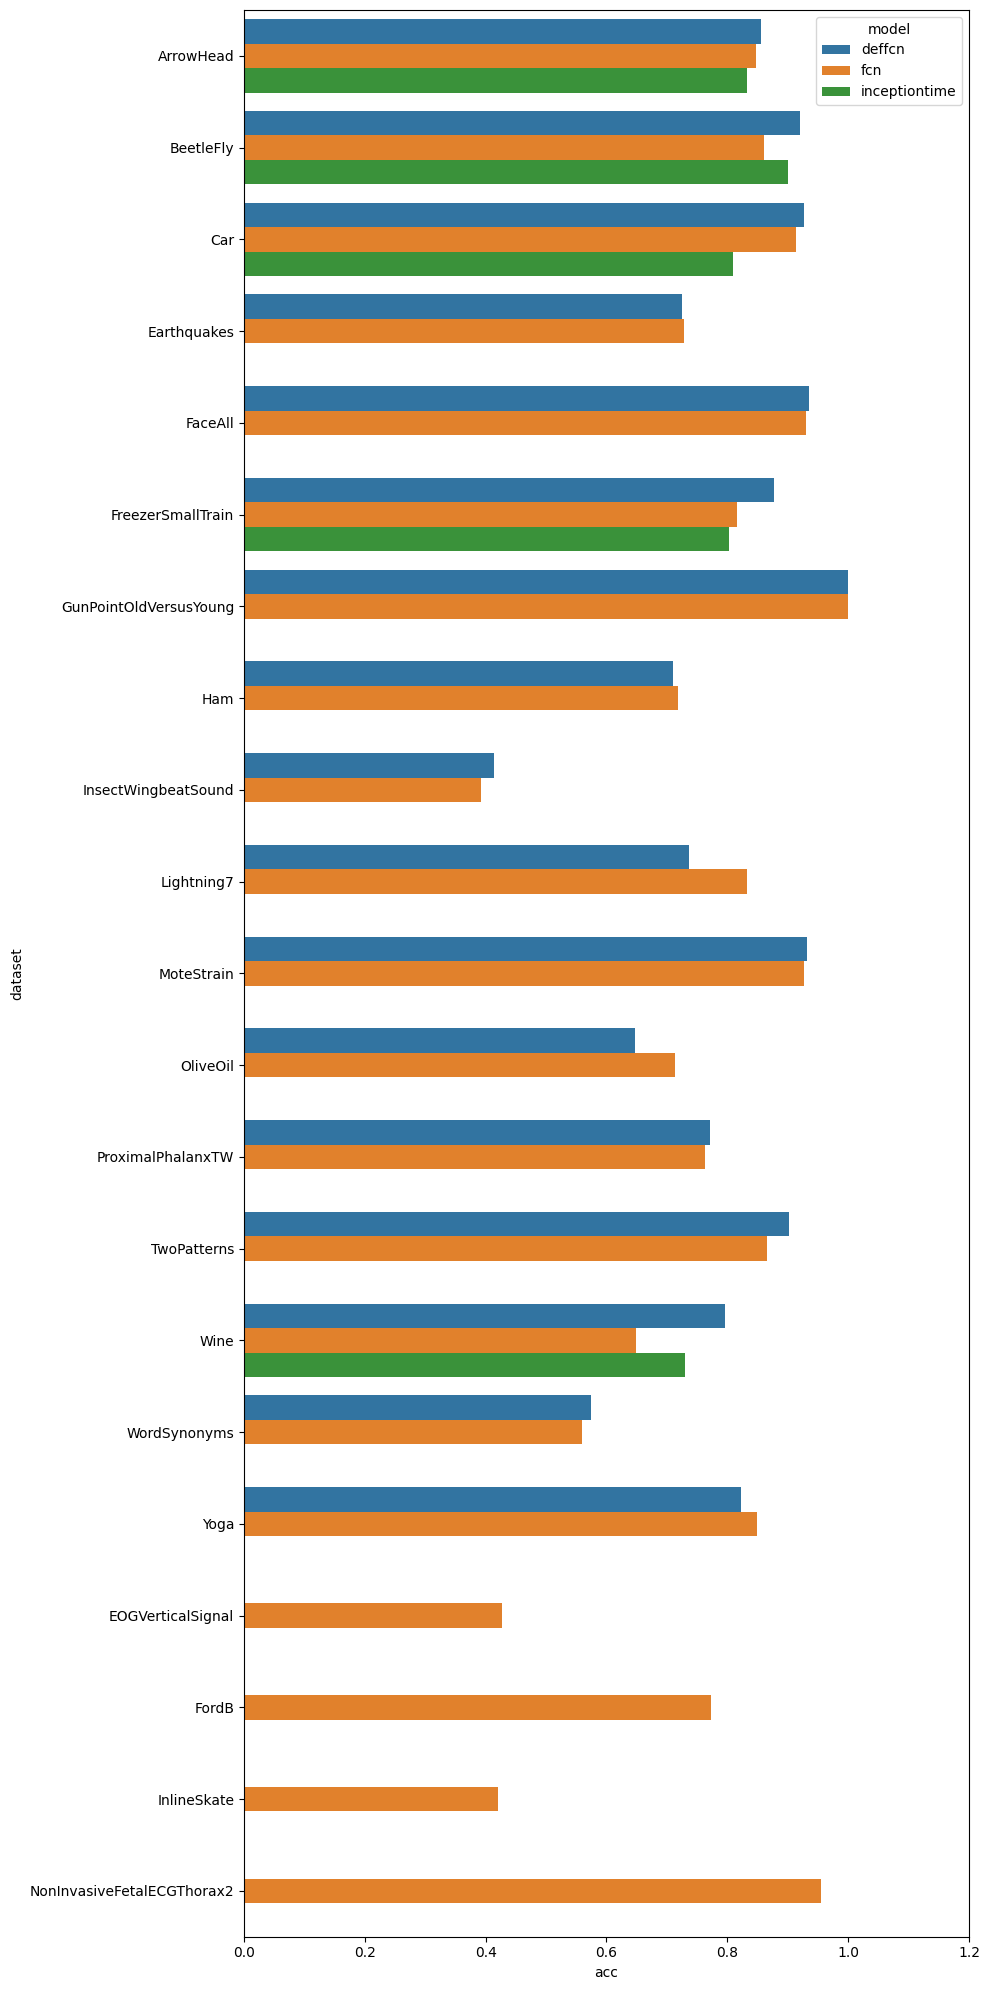

In [55]:
plt.figure(figsize=(10, 20))
sns.barplot(data=grouped_subset_results, x='acc', y='dataset', hue='model')
plt.xlim([0, 1.2])
plt.tight_layout()